# Project: Wrangling and Analyze Data

## Importing modules 

In [1]:
import pandas as pd
import numpy as np
import wptools
import requests
from PIL import Image
from io import BytesIO
import os
import seaborn as sns
import matplotlib.pyplot as plt
import json
import re
% matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
df=pd.read_csv('twitter-archive-enhanced (2).csv')
df.head()



,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
folder_name='image_pred'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)


In [4]:
with open(os.path.join(folder_name, url.split('/')[-1]),mode='wb') as file:
        file.write(response.content)

In [5]:
image_pred = pd.read_csv('image-predictions.tsv', sep='\t')
image_pred.head()



,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
import tweepy as tw
from tweepy import OAuthHandler
from timeit import default_timer as timer
from tweepy import API
consumer_key = 'key'  
consumer_secret = 'secret'
access_token = 'token'
access_secret = 'secret'

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tw.API(auth, wait_on_rate_limit=True)
tweet_ids = df.tweet_id.values

In [7]:
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tw.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [8]:
data = []

with open('tweet_json.txt') as file:
    for line in file:
        data.append(json.loads(line))
        
        
        
len(data)

2306

In [9]:
df1= pd.DataFrame(data)
tweetdf=df1[['id','retweet_count','favorite_count']]
tweetdf.head()

,id,retweet_count,favorite_count
0,892420643555336193,7155,34426
1,892177421306343426,5380,29851
2,891815181378084864,3545,22468
3,891689557279858688,7368,37630
4,891327558926688256,7912,35950


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
df[df['retweeted_status_id'].isnull()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
tweetdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2306 entries, 0 to 2305
Data columns (total 3 columns):
id                2306 non-null int64
retweet_count     2306 non-null int64
favorite_count    2306 non-null int64
dtypes: int64(3)
memory usage: 54.1 KB


In [13]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
df.name.duplicated().sum()
dup=df[df.duplicated('name')]
dup.name.unique()
val=[0]
dup.loc[(df['name'] == 'None') & df['rating_numerator'].isin(val)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [15]:
df.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [16]:
df.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

In [17]:
old=df[df['timestamp'].str.contains("2017-07")]
old.tweet_id.count()

56

In [18]:
no_type=df.loc[(df['floofer'] == 'None') & (df['pupper'] == 'None') & (df['puppo'] == 'None') & (df['doggo'] == 'None')] 
no_type.tweet_id.count()

1976

In [19]:
df.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [20]:
df.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [21]:
df.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Tucker        10
Penny         10
Lola          10
Bo             9
Winston        9
Sadie          8
the            8
Daisy          7
Toby           7
Buddy          7
an             7
Bailey         7
Dave           6
Bella          6
Milo           6
Rusty          6
Jax            6
Jack           6
Koda           6
Stanley        6
Scout          6
Oscar          6
Leo            6
Chester        5
            ... 
Duchess        1
Stefan         1
Bowie          1
Sweet          1
Zeus           1
Eriq           1
Tupawc         1
Wesley         1
Tom            1
Mairi          1
Gòrdón         1
Maxwell        1
Butters        1
Florence       1
Gustav         1
Bonaparte      1
Brockly        1
Grady          1
Pumpkin        1
Jimbo          1
Goliath        1
Blu            1
Edd            1
Timofy         1
Ashleigh       1
Jennifur       1
Billl          1
Rover         

In [22]:
text_num=df[df.rating_numerator > 20]
great=text_num[['text', 'rating_numerator', 'rating_denominator']]
great

,text,rating_numerator,rating_denominator
188,@dhmontgomery We also gave snoop dogg a 420/10...,420,10
189,@s8n You tried very hard to portray this good ...,666,10
290,@markhoppus 182/10,182,10
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0
340,"RT @dog_rates: This is Logan, the Chow who liv...",75,10
433,The floofs have been released I repeat the flo...,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
695,"This is Logan, the Chow who lived. He solemnly...",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10
902,Why does this never happen at my front door......,165,150


### Tidiness issues
1. Inconsistency of column labeling in the three tables. The additional information from the Twitter API file's tweet id column is names "id" whilst it is tweet_id on the other tables. This will make combining the tables difficult since thats the the column that has identical entries in the three tables. 

2. The dog stages are in different columns instead of one where the classification can be by row. 


### Quality issues

#### Twitter archive data

1. Twitter archive data has missing values in 5 columns(in_reply_to_status_id , in_reply_to_user_id, retweeted_status_id,retweeted_status_timestamp, retweeted_status_user_id). Data contains retweets that may contain images and need to be removed to keep original tweets. 

2. The timestamp data type is a string instead of the appropriate type which should be datetime.


3. The twitter archive rating denominator data has the value 0. It will lead to a problem when ranking. Some numbers a a combination of many dogs summed and some ratings are decimals and only the number after the decimal point but before "/" was picked as a numeratorator. Some denominators are not 10. Any number divided by zero will be undefined. It will lead to a problem when ranking. 


4. Some dogs do not have names-745 are written none and 55 have the name 'a'. 


5. 1976 of the tweets dont have dog categories



6. Column name fluffer is inaccurarate. Dog stage name is floof and not floofer.


7. Data contains retweets that may contain images and need to be removed to keep original tweets. 

8. tweet_id is an integer and not a string.



#### image_pred data

1. Predicted image names on image_pred data have grammatic errors where some names have a capital fist letter and and some have small letters.

2. Some tweets do not contain images. 2356 tweets vs 2075 images.




## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [23]:
# Make copies of original pieces of data
tweetdf_clean=tweetdf.copy()
image_pred_clean=image_pred.copy()
df_clean=df.copy()


### Issue #1:

#### 1. Define

Remove all re-tweet rows and drop retweet columns to only keep original tweets using drop().

#### Code

In [25]:
df_clean=df_clean[df_clean['retweeted_status_id'].isna()]
df_clean=df_clean[df_clean['in_reply_to_status_id'].isna()]

df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
              'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [26]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(2), object(10)
memory usage: 213.0+ KB


#### 2. Define

The timestamp data type is a string instead of the appropriate type which should be datetime. Convert using to_datetime

#### Code

In [27]:

df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

#### Test


In [28]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 213.0+ KB


In [29]:
tweetdf_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2306 entries, 0 to 2305
Data columns (total 3 columns):
tweet_id          2306 non-null object
retweet_count     2306 non-null int64
favorite_count    2306 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.1+ KB


#### 3: Define

Column name fluffer is inaccurarate. Dog stage name is floof and not fluffer. Correct using rename 

#### Code

In [30]:

df_clean.rename(columns={'floofer':'floof'}, inplace=True)

#### Test

In [31]:
list(df_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floof',
 'pupper',
 'puppo']

#### 4. 
tweet_id is an integer and not a string. Convert integer to string using astype(). Do the same for tweetdf data after changing 'id' to tweet_id

#### Code

In [32]:
df_clean['tweet_id'] = df_clean['tweet_id'].astype(str)
image_pred_clean['tweet_id'] = df_clean['tweet_id'].astype(str)
tweetdf_clean.rename(columns={'id':'tweet_id'}, inplace=True)
tweetdf_clean['tweet_id'] = tweetdf_clean['tweet_id'].astype(str)


#### Test

In [33]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floof                 2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 213.0+ KB


In [34]:
tweetdf_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2306 entries, 0 to 2305
Data columns (total 3 columns):
tweet_id          2306 non-null object
retweet_count     2306 non-null int64
favorite_count    2306 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.1+ KB


In [35]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### 5.

Predicted image names on image_pred data have grammatic errors where some names have a capital first letter and and some have small letters. Capitalize first letters using capitalize()

#### Code

In [36]:
#image_pred_clean['p1', 'p2']=image_pred_clean['p1', 'p2'].str.capitalize()
image_pred_clean.apply(lambda x: x.astype(str).str.capitalize()).head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,Https://pbs.twimg.com/media/ct4udn0wwaa0amy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.0614285,True
1,892177421306343426,Https://pbs.twimg.com/media/ct42grguyaa5ido.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.0741917,True,Rhodesian_ridgeback,0.07201,True
2,891815181378084864,Https://pbs.twimg.com/media/ct4521twwaevmyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,891689557279858688,Https://pbs.twimg.com/media/ct5dr8hueaa-leu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,891327558926688256,Https://pbs.twimg.com/media/ct5iqmsxiaaky4a.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [37]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### 6.

Make a new column named dog_stage to replace the split dog stage columns using extract() and remove the 4 old dog stage columns. 

#### Code


In [38]:
df_clean['dog_stage'] = df['text'].str.extract('(doggo|floofer|floof|puppo|pupper)', expand=False)

In [39]:
df_clean.drop([ 'doggo', 'floof', 'puppo', 'pupper'], axis=1, inplace=True)


#### Test

In [40]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             372 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 163.8+ KB


In [41]:
df_clean.dog_stage.value_counts()

pupper     240
doggo       80
puppo       29
floof       20
floofer      3
Name: dog_stage, dtype: int64

#### 7

Remove invalid ratings

#### Code

In [42]:
values=[0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2]
val=[1776, 75, 420, 75, 27, 25, 26, 24]
df_clean=df_clean[df_clean.rating_denominator.isin(values)== False]
df_clean=df_clean[df_clean.rating_numerator.isin(val)== False]

#### Test

In [43]:
df_clean.rating_denominator.unique()

array([10])

In [44]:
df_clean.rating_numerator.unique()

array([13, 12, 14,  5, 11,  6, 10,  0,  3,  7,  8,  9,  4,  2,  1])

#### 8

Extract dog names that come after "named" on text.

#### Code


In [45]:
def get_name(text):
    m = re.search(r"named\s(\w+)", text)
    return m.group(1) if m else None

df_clean["name_2"]= df_clean["text"].map(get_name)

df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,name_2
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,None


In [46]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2075 non-null object
timestamp             2075 non-null datetime64[ns]
source                2075 non-null object
text                  2075 non-null object
expanded_urls         2072 non-null object
rating_numerator      2075 non-null int64
rating_denominator    2075 non-null int64
name                  2075 non-null object
dog_stage             364 non-null object
name_2                23 non-null object
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 178.3+ KB


### Issue #2:

#### Define

The joining column for the three tables should have a common name: tweet_id. Rename "id" in tweet data to tweet_id.  

#### Code

In [47]:
m1=pd.merge(df_clean, tweetdf_clean, on='tweet_id', left_index=True, how='left')
m2=pd.merge(m1,image_pred_clean, on='tweet_id',  left_index=True, how='left')
m2=m2[m2.jpg_url.notnull()]
m2=m2[m2.retweet_count.notnull()]
m2['retweet_count'] = m2['retweet_count'].astype('Int64')
m2['favorite_count'] = m2['favorite_count'].astype('Int64')
m2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1776 entries, 0 to 2073
Data columns (total 23 columns):
tweet_id              1776 non-null object
timestamp             1776 non-null datetime64[ns]
source                1776 non-null object
text                  1776 non-null object
expanded_urls         1773 non-null object
rating_numerator      1776 non-null int64
rating_denominator    1776 non-null int64
name                  1776 non-null object
dog_stage             358 non-null object
name_2                4 non-null object
retweet_count         1776 non-null int64
favorite_count        1776 non-null int64
jpg_url               1776 non-null object
img_num               1776 non-null float64
p1                    1776 non-null object
p1_conf               1776 non-null float64
p1_dog                1776 non-null object
p2                    1776 non-null object
p2_conf               1776 non-null float64
p2_dog                1776 non-null object
p3                    1776 non

#### code

#### Define

#### Code

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [48]:
m2.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

Analysis of most common dog type from picture predictions- p1

In [49]:
m2.p1.value_counts()

golden_retriever                  133
Labrador_retriever                 85
Pembroke                           72
Chihuahua                          72
pug                                53
Samoyed                            38
chow                               37
toy_poodle                         34
Pomeranian                         32
cocker_spaniel                     26
French_bulldog                     24
malamute                           24
Chesapeake_Bay_retriever           21
miniature_pinscher                 21
seat_belt                          19
Cardigan                           19
Siberian_husky                     18
beagle                             17
Eskimo_dog                         17
Staffordshire_bullterrier          17
German_shepherd                    17
web_site                           16
Italian_greyhound                  15
kuvasz                             15
teddy                              15
Lakeland_terrier                   14
Maltese_dog 

Analysis of most frequent dog stage. 

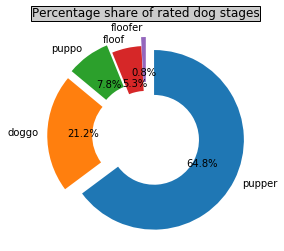

In [50]:
sorted_counts = m2['dog_stage'].value_counts()
mylabels = ["pupper", "doggo", "puppo","floof", "floofer" ]
explode = [0.1, 0.1, 0.1, 0,0.1]
plt.pie(sorted_counts, labels =mylabels, autopct='%1.1f%%', startangle = 90,wedgeprops = {'width' : 0.5}, explode = explode, counterclock = False,)
plt.axis('square')
plt.xticks(rotation=20);
plt.title("Percentage share of rated dog stages", bbox={'facecolor':'0.8', 'pad':1})
plt.show()

Checking for correlation between retweet and favorite counts and if high rating correspond with high retweets/favorite counts. 

Text(0,0.5,'retweet_count')

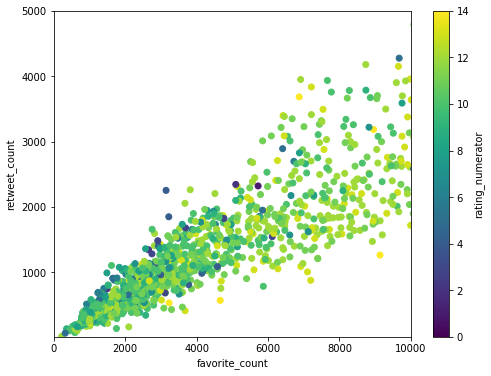

In [51]:
plt.figure(figsize = [8,6])
plt.scatter(data = m2, x = 'favorite_count', y = 'retweet_count',
                c = 'rating_numerator')
plt.colorbar(label = 'rating_numerator')
plt.xlim(0,10000)
plt.ylim(15,5000)
plt.xlabel('favorite_count')
plt.ylabel('retweet_count')


Numberator score with the highest frequecy. 

Text(0.5,1,'Dog rating frequency')

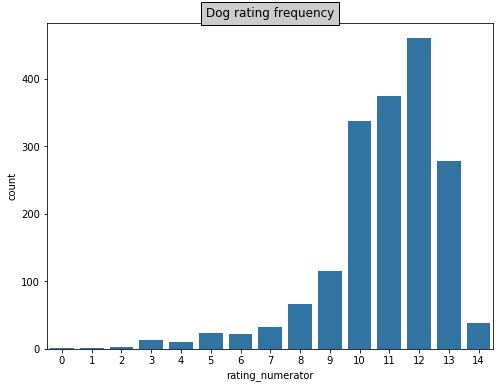

In [52]:
plt.figure(figsize = [8,6])
base_color = sns.color_palette()[0]
sns.countplot(data=m2, x='rating_numerator', color=base_color);
plt.title("Dog rating frequency", bbox={'facecolor':'0.8', 'pad':5})

### Insights:
1. The most posted dogs are golden_retrievers

2. Dog stage pupper has the hishest rating of 64.6% vs floofs at 6% (floof+floofer)
3. There's a positive correlation between retweet and favourite count. And although there are a few outliers, higher rating score seem to correlate with high retweet_counts and favorite_counts. 
4. Most dogs were rated 12/10. 

### Visualization